# Import Library

In [1]:
pip install emoji 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 197 kB 7.2 MB/s 
  Created wheel for emoji: filename=emoji-2.0.0-py3-none-any.whl size=193022 sha256=5911dddc09f6827f125e045b849af08aeaeecc39ab86506ce081adb636413af9
  Stored in directory: /root/.cache/pip/wheels/ec/29/4d/3cfe7452ac7d8d83b1930f8a6205c3c9649b24e80f9029fc38
Successfully built emoji


In [2]:
pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 106 kB 7.7 MB/s 
     |████████████████████████████████| 287 kB 19.8 MB/s 


In [3]:
import pandas as pd
import numpy as np
import emoji
import contractions
import re
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
%matplotlib inline
import nltk

import nltk
nltk.download("punkt")
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')

from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet
nltk.download('sentiwordnet')
from sklearn import svm
from sklearn.svm import SVC
from nltk.corpus import sentiwordnet as swn
import pickle

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.


In [4]:
df = pd.read_csv('ebay_reviews.csv')
df

,category,review title,review content,rating
0,Headsets,Wireless gaming headset,This gaming headset ticks all the boxes # look...,5
1,Headsets,"Good for those with a big head, low budget","Easy setup, rated for 6 hours battery but mine...",3
2,Headsets,MezumiWireless Gaming Headset,I originally bought this wireless headset for ...,5
3,Headsets,HW- S2 great headset.,"This is my 2nd Mezumi headset, It kills the fi...",5
4,Headsets,BEST HEADPHONES I'VE PURCHASED IN MY ENTIRE LIFE,This is probably the best headset I've purchas...,5
...,...,...,...,...
44751,Racks & Holders,Utensil holder,Reasonably priced but a little flimsy,3
44752,Racks & Holders,Recommended,As described,5
44753,Racks & Holders,cheap looking,cheap looking,1
44754,Racks & Holders,Ok,Okay,5


In [5]:
df.sample(100)

,category,review title,review content,rating
936,Video Game Consoles,Terrible,Unfortunately this unit overheats within a cou...,1
3601,Cell Phones & Smartphones,Awesome phone.,This phone arrived with little to no wear for ...,5
17120,Smart Speakers,Lots of fun and very handy!,This thing is pretty cool. I am still learning...,5
33292,Cell Phones & Smartphones,It arrived on time,Verified purchase: Yes | Condition: pre-owned...,5
40176,Headphones,Stay with the Bose QC20 instead!,Sound is disappointing for a high end brand. N...,2
...,...,...,...,...
20968,Headsets,You get what you pay for,Apple headphones work fine but are obviously n...,3
10616,PC Laptops & Netbooks,Satisfied.,Very satisfied. Came early than expected.,5
30946,Cell Phones & Smartphones,Great product,"Great product, fast charging, only need to cha...",5
13344,Digital Cameras,Perfect “parent camera”,Built like a tank. Good for sports and fast mo...,5


# Preprocessing

#### 1. Cleaning Data

In [6]:
def html_remover(data):
    beauti = BeautifulSoup(data,'html.parser')
    return beauti.get_text()

def convert_emoji(data):
    return emoji.demojize(data)

def url_remover(data):
    return re.sub('(http|https):\/\/\S+', '',data)

def remove_round_brackets(data):
    return re.sub('\(.*?\)','',data)

def remove_punc(data):
    document = re.sub(r'[^\w\s]','', data)
    return document 

def white_space(data):
    return ' '.join(data.split())

def text_lower(data):
    return data.lower()

def contraction_replace(data):
    return contractions.fix(data)

def remove_number(data):
    return re.sub(r"\d+", "", data)

def remove_singl_char(data):
    return re.sub(r"\b[a-zA-Z]\b", "", data)

def web_associated(data):
    new_data = html_remover(data)
    new_data = convert_emoji(new_data)
    new_data = url_remover(new_data)
    new_data = remove_round_brackets(new_data)
    new_data = remove_punc(new_data)
    new_data = white_space(new_data)
    new_data = text_lower(new_data)
    new_data = contraction_replace(new_data)
    new_data = remove_number(new_data)
    new_data = remove_singl_char(new_data)
    return new_data

df['cleaning data'] = df['review content'].apply(web_associated)

/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:273: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:273: UserWarning: "b'..'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


In [7]:
df.head()

,category,review title,review content,rating,cleaning data
0,Headsets,Wireless gaming headset,This gaming headset ticks all the boxes # look...,5,this gaming headset ticks all the boxes looks ...
1,Headsets,"Good for those with a big head, low budget","Easy setup, rated for 6 hours battery but mine...",3,easy setup rated for hours battery but mine h...
2,Headsets,MezumiWireless Gaming Headset,I originally bought this wireless headset for ...,5,originally bought this wireless headset for m...
3,Headsets,HW- S2 great headset.,"This is my 2nd Mezumi headset, It kills the fi...",5,this is my nd mezumi headset it kills the firs...
4,Headsets,BEST HEADPHONES I'VE PURCHASED IN MY ENTIRE LIFE,This is probably the best headset I've purchas...,5,this is probably the best headset have purcha...


### 2. Tokenizing

In [8]:
def tokenize(data):
    return nltk.word_tokenize(data)

In [9]:
df['tokenizing'] = df['cleaning data'].apply(tokenize)

### 3. Negation Handling 

In [10]:
def Negation(sentence):	
    temp = int(0)
    for i in range(len(sentence)):
        if sentence[i-1] in ['not',"n't"]:
            antonyms = []
            for syn in wordnet.synsets(sentence[i]):
                syns = wordnet.synsets(sentence[i])
                w1 = syns[0].name()
                temp = 0
                for l in syn.lemmas():
                    if l.antonyms():
                        antonyms.append(l.antonyms()[0].name())
                max_dissimilarity = 0
                for ant in antonyms:
                    syns = wordnet.synsets(ant)
                    w2 = syns[0].name()
                    syns = wordnet.synsets(sentence[i])
                    w1 = syns[0].name()
                    word1 = wordnet.synset(w1)
                    word2 = wordnet.synset(w2)
                    if isinstance(word1.wup_similarity(word2), float) or isinstance(word1.wup_similarity(word2), int):
                        temp = 1 - word1.wup_similarity(word2)
                    if temp>max_dissimilarity:
                        max_dissimilarity = temp
                        antonym_max = ant
                        sentence[i] = antonym_max
                        sentence[i-1] = ''
    while '' in sentence:
        sentence.remove('')
    return sentence

In [11]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [12]:
df['negation'] = df['tokenizing'].apply(Negation)

### Stopword

In [13]:
def stopword(data):
    nltk.download('stopwords')
    clean = []
    for i in data:
        if i not in stopwords.words('english'):
            clean.append(i)
    return clean

In [14]:
df['stopword'] = df['negation'].apply(stopword)

Streaming output truncated to the last 5000 lines.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-dat

### 4. Lemmatization

In [15]:
def lemmatization(data):
    nltk.download('wordnet')
    lemma = WordNetLemmatizer()
    lemmas = []
    for i in data:
        lem = lemma.lemmatize(i, pos='v')
        lemmas.append(lem)
    return lemmas 

In [16]:
df['lemma'] = df['stopword'].apply(lemmatization)

Streaming output truncated to the last 5000 lines.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading packa

In [17]:
df

,category,review title,review content,rating,cleaning data,tokenizing,negation,stopword,lemma
0,Headsets,Wireless gaming headset,This gaming headset ticks all the boxes # look...,5,this gaming headset ticks all the boxes looks ...,"[this, gaming, headset, ticks, all, the, boxes...","[this, gaming, headset, ticks, all, the, boxes...","[gaming, headset, ticks, boxes, looks, grate, ...","[game, headset, tick, box, look, grate, build,..."
1,Headsets,"Good for those with a big head, low budget","Easy setup, rated for 6 hours battery but mine...",3,easy setup rated for hours battery but mine h...,"[easy, setup, rated, for, hours, battery, but,...","[easy, setup, rated, for, hours, battery, but,...","[easy, setup, rated, hours, battery, mine, las...","[easy, setup, rat, hours, battery, mine, last,..."
2,Headsets,MezumiWireless Gaming Headset,I originally bought this wireless headset for ...,5,originally bought this wireless headset for m...,"[originally, bought, this, wireless, headset, ...","[originally, bought, this, wireless, headset, ...","[originally, bought, wireless, headset, xbox, ...","[originally, buy, wireless, headset, xbox, plu..."
3,Headsets,HW- S2 great headset.,"This is my 2nd Mezumi headset, It kills the fi...",5,this is my nd mezumi headset it kills the firs...,"[this, is, my, nd, mezumi, headset, it, kills,...","[this, is, my, nd, mezumi, headset, it, kills,...","[nd, mezumi, headset, kills, first, one, bette...","[nd, mezumi, headset, kill, first, one, better..."
4,Headsets,BEST HEADPHONES I'VE PURCHASED IN MY ENTIRE LIFE,This is probably the best headset I've purchas...,5,this is probably the best headset have purcha...,"[this, is, probably, the, best, headset, have,...","[this, is, probably, the, best, headset, have,...","[probably, best, headset, purchased, till, dat...","[probably, best, headset, purchase, till, date..."
...,...,...,...,...,...,...,...,...,...
44751,Racks & Holders,Utensil holder,Reasonably priced but a little flimsy,3,reasonably priced but little flimsy,"[reasonably, priced, but, little, flimsy]","[reasonably, priced, but, little, flimsy]","[reasonably, priced, little, flimsy]","[reasonably, price, little, flimsy]"
44752,Racks & Holders,Recommended,As described,5,as described,"[as, described]","[as, described]",[described],[describe]
44753,Racks & Holders,cheap looking,cheap looking,1,cheap looking,"[cheap, looking]","[cheap, looking]","[cheap, looking]","[cheap, look]"
44754,Racks & Holders,Ok,Okay,5,okay,[okay],[okay],[okay],[okay]


### 5. Pos Tagging

In [18]:
#POS tagger dictionary
post_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def pos_tagging(tokens):
    return pos_tag(tokens)

In [19]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [20]:
df['pos_tag'] = df['lemma'].apply(pos_tagging)

In [21]:
df

,category,review title,review content,rating,cleaning data,tokenizing,negation,stopword,lemma,pos_tag
0,Headsets,Wireless gaming headset,This gaming headset ticks all the boxes # look...,5,this gaming headset ticks all the boxes looks ...,"[this, gaming, headset, ticks, all, the, boxes...","[this, gaming, headset, ticks, all, the, boxes...","[gaming, headset, ticks, boxes, looks, grate, ...","[game, headset, tick, box, look, grate, build,...","[(game, NN), (headset, NN), (tick, NN), (box, ..."
1,Headsets,"Good for those with a big head, low budget","Easy setup, rated for 6 hours battery but mine...",3,easy setup rated for hours battery but mine h...,"[easy, setup, rated, for, hours, battery, but,...","[easy, setup, rated, for, hours, battery, but,...","[easy, setup, rated, hours, battery, mine, las...","[easy, setup, rat, hours, battery, mine, last,...","[(easy, JJ), (setup, NN), (rat, NN), (hours, N..."
2,Headsets,MezumiWireless Gaming Headset,I originally bought this wireless headset for ...,5,originally bought this wireless headset for m...,"[originally, bought, this, wireless, headset, ...","[originally, bought, this, wireless, headset, ...","[originally, bought, wireless, headset, xbox, ...","[originally, buy, wireless, headset, xbox, plu...","[(originally, RB), (buy, VB), (wireless, JJ), ..."
3,Headsets,HW- S2 great headset.,"This is my 2nd Mezumi headset, It kills the fi...",5,this is my nd mezumi headset it kills the firs...,"[this, is, my, nd, mezumi, headset, it, kills,...","[this, is, my, nd, mezumi, headset, it, kills,...","[nd, mezumi, headset, kills, first, one, bette...","[nd, mezumi, headset, kill, first, one, better...","[(nd, JJ), (mezumi, NN), (headset, NN), (kill,..."
4,Headsets,BEST HEADPHONES I'VE PURCHASED IN MY ENTIRE LIFE,This is probably the best headset I've purchas...,5,this is probably the best headset have purcha...,"[this, is, probably, the, best, headset, have,...","[this, is, probably, the, best, headset, have,...","[probably, best, headset, purchased, till, dat...","[probably, best, headset, purchase, till, date...","[(probably, RB), (best, JJS), (headset, JJ), (..."
...,...,...,...,...,...,...,...,...,...,...
44751,Racks & Holders,Utensil holder,Reasonably priced but a little flimsy,3,reasonably priced but little flimsy,"[reasonably, priced, but, little, flimsy]","[reasonably, priced, but, little, flimsy]","[reasonably, priced, little, flimsy]","[reasonably, price, little, flimsy]","[(reasonably, RB), (price, NN), (little, JJ), ..."
44752,Racks & Holders,Recommended,As described,5,as described,"[as, described]","[as, described]",[described],[describe],"[(describe, NN)]"
44753,Racks & Holders,cheap looking,cheap looking,1,cheap looking,"[cheap, looking]","[cheap, looking]","[cheap, looking]","[cheap, look]","[(cheap, JJ), (look, NN)]"
44754,Racks & Holders,Ok,Okay,5,okay,[okay],[okay],[okay],[okay],"[(okay, NN)]"


In [22]:
df.to_csv('preprocessing2.csv', index=False)

In [23]:
df = pd.read_csv('preprocessing2.csv')
df

,category,review title,review content,rating,cleaning data,tokenizing,negation,stopword,lemma,pos_tag
0,Headsets,Wireless gaming headset,This gaming headset ticks all the boxes # look...,5,this gaming headset ticks all the boxes looks ...,"['this', 'gaming', 'headset', 'ticks', 'all', ...","['this', 'gaming', 'headset', 'ticks', 'all', ...","['gaming', 'headset', 'ticks', 'boxes', 'looks...","['game', 'headset', 'tick', 'box', 'look', 'gr...","[('game', 'NN'), ('headset', 'NN'), ('tick', '..."
1,Headsets,"Good for those with a big head, low budget","Easy setup, rated for 6 hours battery but mine...",3,easy setup rated for hours battery but mine h...,"['easy', 'setup', 'rated', 'for', 'hours', 'ba...","['easy', 'setup', 'rated', 'for', 'hours', 'ba...","['easy', 'setup', 'rated', 'hours', 'battery',...","['easy', 'setup', 'rat', 'hours', 'battery', '...","[('easy', 'JJ'), ('setup', 'NN'), ('rat', 'NN'..."
2,Headsets,MezumiWireless Gaming Headset,I originally bought this wireless headset for ...,5,originally bought this wireless headset for m...,"['originally', 'bought', 'this', 'wireless', '...","['originally', 'bought', 'this', 'wireless', '...","['originally', 'bought', 'wireless', 'headset'...","['originally', 'buy', 'wireless', 'headset', '...","[('originally', 'RB'), ('buy', 'VB'), ('wirele..."
3,Headsets,HW- S2 great headset.,"This is my 2nd Mezumi headset, It kills the fi...",5,this is my nd mezumi headset it kills the firs...,"['this', 'is', 'my', 'nd', 'mezumi', 'headset'...","['this', 'is', 'my', 'nd', 'mezumi', 'headset'...","['nd', 'mezumi', 'headset', 'kills', 'first', ...","['nd', 'mezumi', 'headset', 'kill', 'first', '...","[('nd', 'JJ'), ('mezumi', 'NN'), ('headset', '..."
4,Headsets,BEST HEADPHONES I'VE PURCHASED IN MY ENTIRE LIFE,This is probably the best headset I've purchas...,5,this is probably the best headset have purcha...,"['this', 'is', 'probably', 'the', 'best', 'hea...","['this', 'is', 'probably', 'the', 'best', 'hea...","['probably', 'best', 'headset', 'purchased', '...","['probably', 'best', 'headset', 'purchase', 't...","[('probably', 'RB'), ('best', 'JJS'), ('headse..."
...,...,...,...,...,...,...,...,...,...,...
44751,Racks & Holders,Utensil holder,Reasonably priced but a little flimsy,3,reasonably priced but little flimsy,"['reasonably', 'priced', 'but', 'little', 'fli...","['reasonably', 'priced', 'but', 'little', 'fli...","['reasonably', 'priced', 'little', 'flimsy']","['reasonably', 'price', 'little', 'flimsy']","[('reasonably', 'RB'), ('price', 'NN'), ('litt..."
44752,Racks & Holders,Recommended,As described,5,as described,"['as', 'described']","['as', 'described']",['described'],['describe'],"[('describe', 'NN')]"
44753,Racks & Holders,cheap looking,cheap looking,1,cheap looking,"['cheap', 'looking']","['cheap', 'looking']","['cheap', 'looking']","['cheap', 'look']","[('cheap', 'JJ'), ('look', 'NN')]"
44754,Racks & Holders,Ok,Okay,5,okay,['okay'],['okay'],['okay'],['okay'],"[('okay', 'NN')]"


## Pelabelan

### TextBlob

In [24]:
from textblob import TextBlob

def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

def getPolarity(review):
    return TextBlob(review).sentiment.polarity

def analyze(score):
    if score  < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [25]:
final_data = pd.DataFrame(df[['category','review content', 'lemma', 'rating']])
final_data.head()

,category,review content,lemma,rating
0,Headsets,This gaming headset ticks all the boxes # look...,"['game', 'headset', 'tick', 'box', 'look', 'gr...",5
1,Headsets,"Easy setup, rated for 6 hours battery but mine...","['easy', 'setup', 'rat', 'hours', 'battery', '...",3
2,Headsets,I originally bought this wireless headset for ...,"['originally', 'buy', 'wireless', 'headset', '...",5
3,Headsets,"This is my 2nd Mezumi headset, It kills the fi...","['nd', 'mezumi', 'headset', 'kill', 'first', '...",5
4,Headsets,This is probably the best headset I've purchas...,"['probably', 'best', 'headset', 'purchase', 't...",5


In [26]:
final_data['Subjectivity'] = final_data['lemma'].apply(getSubjectivity)
final_data['Polarity'] =  final_data['lemma'].apply(getPolarity)
final_data['TextBlob'] = final_data['Polarity'].apply(analyze)
final_data.head()

,category,review content,lemma,rating,Subjectivity,Polarity,TextBlob
0,Headsets,This gaming headset ticks all the boxes # look...,"['game', 'headset', 'tick', 'box', 'look', 'gr...",5,0.583333,0.305556,Positive
1,Headsets,"Easy setup, rated for 6 hours battery but mine...","['easy', 'setup', 'rat', 'hours', 'battery', '...",3,0.546289,0.203782,Positive
2,Headsets,I originally bought this wireless headset for ...,"['originally', 'buy', 'wireless', 'headset', '...",5,0.537100,0.246900,Positive
3,Headsets,"This is my 2nd Mezumi headset, It kills the fi...","['nd', 'mezumi', 'headset', 'kill', 'first', '...",5,0.407143,0.300000,Positive
4,Headsets,This is probably the best headset I've purchas...,"['probably', 'best', 'headset', 'purchase', 't...",5,0.597222,0.493750,Positive


In [27]:
tb_counts = final_data.TextBlob.value_counts()
tb_counts

Positive    37705
Neutral      5026
Negative     2025
Name: TextBlob, dtype: int64

([<matplotlib.patches.Wedge at 0x7f38af1bb9d0>,
 [Text(-0.9679988553827723, 0.5224731724956247, 'Positive'),
  Text(0.8842206091510699, -0.6543347112545009, 'Neutral'),
  Text(1.3363849398719245, -0.19124667966663605, 'Negative')],
 [Text(-0.5279993756633303, 0.2849853668157953, '84.2%'),
  Text(0.4823021504460381, -0.35690984250245505, '11.2%'),
  Text(0.8414275547341746, -0.12041457608640047, '4.5%')])

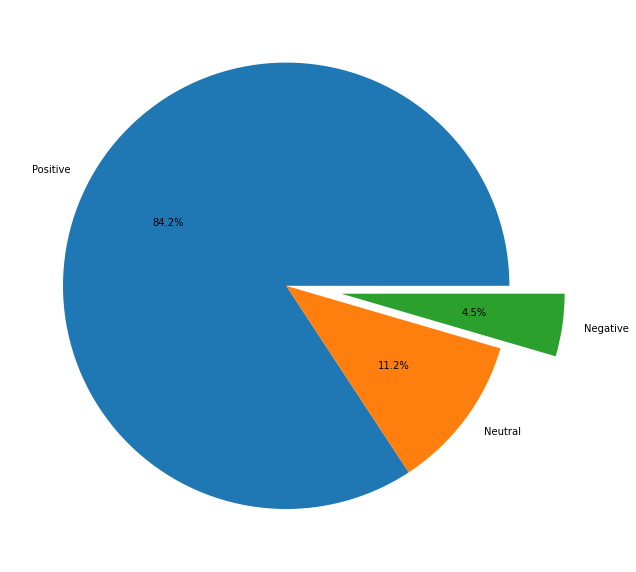

In [28]:
plt.figure(figsize=(10,27))
plt.pie(tb_counts.values, labels=tb_counts.index, explode=(0,0,0.25), autopct='%1.1f%%', shadow=False)

### Vader Sentiment 

In [29]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 8.5 MB/s 


In [30]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer() 

def vaderSentimentAnalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

final_data['Vader Sentiment'] = final_data['lemma'].apply(vaderSentimentAnalysis)
final_data.head()

,category,review content,lemma,rating,Subjectivity,Polarity,TextBlob,Vader Sentiment
0,Headsets,This gaming headset ticks all the boxes # look...,"['game', 'headset', 'tick', 'box', 'look', 'gr...",5,0.583333,0.305556,Positive,0.8720
1,Headsets,"Easy setup, rated for 6 hours battery but mine...","['easy', 'setup', 'rat', 'hours', 'battery', '...",3,0.546289,0.203782,Positive,0.9657
2,Headsets,I originally bought this wireless headset for ...,"['originally', 'buy', 'wireless', 'headset', '...",5,0.537100,0.246900,Positive,0.9920
3,Headsets,"This is my 2nd Mezumi headset, It kills the fi...","['nd', 'mezumi', 'headset', 'kill', 'first', '...",5,0.407143,0.300000,Positive,0.4588
4,Headsets,This is probably the best headset I've purchas...,"['probably', 'best', 'headset', 'purchase', 't...",5,0.597222,0.493750,Positive,0.9862


In [31]:
def vader_analysis(compound):
    if compound >=  0.5:
        return 'Positive'
    elif compound <= -0.5:
        return 'Negative'
    else:
        return 'Neutral'

final_data['vaderSentiment'] = final_data['Vader Sentiment'].apply(vader_analysis)
final_data.head()

,category,review content,lemma,rating,Subjectivity,Polarity,TextBlob,Vader Sentiment,vaderSentiment
0,Headsets,This gaming headset ticks all the boxes # look...,"['game', 'headset', 'tick', 'box', 'look', 'gr...",5,0.583333,0.305556,Positive,0.8720,Positive
1,Headsets,"Easy setup, rated for 6 hours battery but mine...","['easy', 'setup', 'rat', 'hours', 'battery', '...",3,0.546289,0.203782,Positive,0.9657,Positive
2,Headsets,I originally bought this wireless headset for ...,"['originally', 'buy', 'wireless', 'headset', '...",5,0.537100,0.246900,Positive,0.9920,Positive
3,Headsets,"This is my 2nd Mezumi headset, It kills the fi...","['nd', 'mezumi', 'headset', 'kill', 'first', '...",5,0.407143,0.300000,Positive,0.4588,Neutral
4,Headsets,This is probably the best headset I've purchas...,"['probably', 'best', 'headset', 'purchase', 't...",5,0.597222,0.493750,Positive,0.9862,Positive


In [32]:
vader_counts = final_data['vaderSentiment'].value_counts()
vader_counts

Positive    29497
Neutral     14507
Negative      752
Name: vaderSentiment, dtype: int64

([<matplotlib.patches.Wedge at 0x7f38af0f3090>,
 [Text(-0.5270875510304918, 0.9654940256411113, 'Positive'),
  Text(0.4754126591595272, -0.9919590735059928, 'Neutral'),
  Text(1.3481196466959282, -0.07122793126608404, 'Negative')],
 [Text(-0.2875023005620864, 0.5266331048951516, '65.9%'),
  Text(0.2593159959051966, -0.5410685855487233, '32.4%'),
  Text(0.8488160738455843, -0.044847215982349205, '1.7%')])

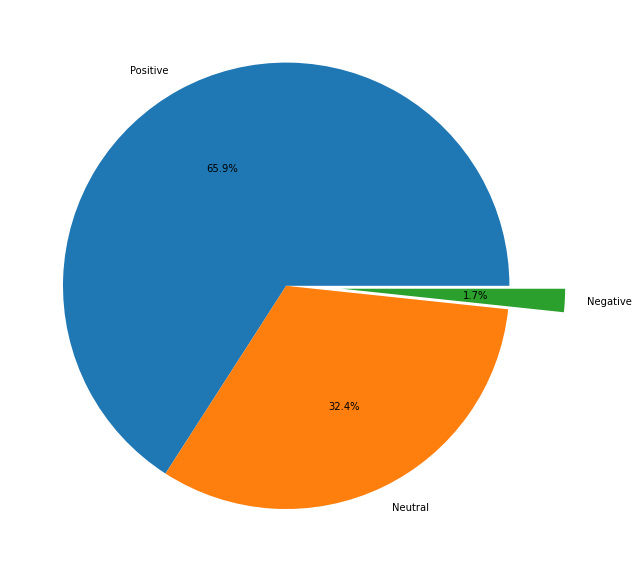

In [33]:
plt.figure(figsize=(10,27))
plt.pie(vader_counts.values, labels=vader_counts.index, explode=(0,0,0.25), autopct='%1.1f%%', shadow=False)

In [34]:
final_data.to_csv('Pelabelan2.csv', index = False)

In [35]:
df = pd.read_csv('Pelabelan2.csv') #read the CSV file
df

,category,review content,lemma,rating,Subjectivity,Polarity,TextBlob,Vader Sentiment,vaderSentiment
0,Headsets,This gaming headset ticks all the boxes # look...,"['game', 'headset', 'tick', 'box', 'look', 'gr...",5,0.583333,0.305556,Positive,0.8720,Positive
1,Headsets,"Easy setup, rated for 6 hours battery but mine...","['easy', 'setup', 'rat', 'hours', 'battery', '...",3,0.546289,0.203782,Positive,0.9657,Positive
2,Headsets,I originally bought this wireless headset for ...,"['originally', 'buy', 'wireless', 'headset', '...",5,0.537100,0.246900,Positive,0.9920,Positive
3,Headsets,"This is my 2nd Mezumi headset, It kills the fi...","['nd', 'mezumi', 'headset', 'kill', 'first', '...",5,0.407143,0.300000,Positive,0.4588,Neutral
4,Headsets,This is probably the best headset I've purchas...,"['probably', 'best', 'headset', 'purchase', 't...",5,0.597222,0.493750,Positive,0.9862,Positive
...,...,...,...,...,...,...,...,...,...
44751,Racks & Holders,Reasonably priced but a little flimsy,"['reasonably', 'price', 'little', 'flimsy']",3,0.550000,0.006250,Positive,0.0000,Neutral
44752,Racks & Holders,As described,['describe'],5,0.000000,0.000000,Neutral,0.0000,Neutral
44753,Racks & Holders,cheap looking,"['cheap', 'look']",1,0.700000,0.400000,Positive,0.0000,Neutral
44754,Racks & Holders,Okay,['okay'],5,0.500000,0.500000,Positive,0.2263,Neutral


In [36]:
data_label = df["review content"]
label = df["TextBlob"]
df.head(5)

,category,review content,lemma,rating,Subjectivity,Polarity,TextBlob,Vader Sentiment,vaderSentiment
0,Headsets,This gaming headset ticks all the boxes # look...,"['game', 'headset', 'tick', 'box', 'look', 'gr...",5,0.583333,0.305556,Positive,0.8720,Positive
1,Headsets,"Easy setup, rated for 6 hours battery but mine...","['easy', 'setup', 'rat', 'hours', 'battery', '...",3,0.546289,0.203782,Positive,0.9657,Positive
2,Headsets,I originally bought this wireless headset for ...,"['originally', 'buy', 'wireless', 'headset', '...",5,0.537100,0.246900,Positive,0.9920,Positive
3,Headsets,"This is my 2nd Mezumi headset, It kills the fi...","['nd', 'mezumi', 'headset', 'kill', 'first', '...",5,0.407143,0.300000,Positive,0.4588,Neutral
4,Headsets,This is probably the best headset I've purchas...,"['probably', 'best', 'headset', 'purchase', 't...",5,0.597222,0.493750,Positive,0.9862,Positive


### Split Data 

In [37]:
X_train, X_test, y_train, y_test = train_test_split(data_label.values, label, test_size = 0.30, random_state = 42)

In [38]:
X_test.shape

(13427,)

## EKSTRAKSI FITUR: Term presence

In [39]:
count_vect = CountVectorizer(binary=True)
X_train_counts = count_vect.fit_transform(data_label)
print(X_train_counts.shape)
count_vect.vocabulary_

(44756, 32506)


{'this': 28335,
 'gaming': 12677,
 'headset': 13937,
 'ticks': 28445,
 'all': 2633,
 'the': 28164,
 'boxes': 4907,
 'looks': 17150,
 'grate': 13269,
 'built': 5221,
 'to': 28587,
 'last': 16517,
 'excellent': 10872,
 'sound': 26303,
 'mic': 18103,
 'comfortable': 6712,
 'wear': 30685,
 'easy': 9927,
 'set': 25191,
 'up': 29734,
 'what': 30830,
 'more': 18586,
 'could': 7552,
 'you': 31594,
 'ask': 3424,
 'for': 12051,
 'setup': 25213,
 'rated': 22793,
 'hours': 14392,
 'battery': 4097,
 'but': 5327,
 'mine': 18233,
 'has': 13798,
 'lasted': 16519,
 'sessions': 25190,
 'over': 20155,
 'good': 13065,
 'loudness': 17213,
 'from': 12338,
 'earcups': 9875,
 'seal': 24921,
 'and': 2896,
 'thick': 28296,
 'padding': 20344,
 'around': 3323,
 'ears': 9903,
 'person': 20864,
 'with': 31098,
 'med': 17872,
 'big': 4457,
 'head': 13903,
 'would': 31276,
 'look': 17139,
 'funny': 12469,
 'on': 19788,
 'small': 25935,
 'child': 6181,
 'though': 28359,
 'as': 3396,
 'they': 28286,
 'are': 3274,
 'lar

In [40]:
X_train_TP = count_vect.transform(X_train)
X_test_TP = count_vect.transform(X_test)

In [41]:
print(X_train_TP)

  (0, 4193)	1
  (0, 4952)	1
  (0, 9240)	1
  (0, 13293)	1
  (0, 15551)	1
  (0, 19154)	1
  (0, 20958)	1
  (0, 21871)	1
  (1, 1917)	1
  (1, 1941)	1
  (1, 4902)	1
  (1, 4952)	1
  (1, 5327)	1
  (1, 6104)	1
  (1, 6990)	1
  (1, 12338)	1
  (1, 13065)	1
  (1, 13293)	1
  (1, 14300)	1
  (1, 14733)	1
  (1, 14828)	1
  (1, 14872)	1
  (1, 15551)	1
  (1, 15613)	1
  (1, 19154)	1
  :	:
  (31328, 13841)	1
  (31328, 14872)	1
  (31328, 15323)	1
  (31328, 15613)	1
  (31328, 16876)	1
  (31328, 16990)	1
  (31328, 17224)	1
  (31328, 18954)	1
  (31328, 19865)	1
  (31328, 20958)	1
  (31328, 21929)	1
  (31328, 24508)	1
  (31328, 24683)	1
  (31328, 24974)	1
  (31328, 25223)	1
  (31328, 26112)	1
  (31328, 28164)	1
  (31328, 28489)	1
  (31328, 28587)	1
  (31328, 30154)	1
  (31328, 30850)	1
  (31328, 31098)	1
  (31328, 31224)	1
  (31328, 31259)	1
  (31328, 31594)	1


## KLASIFIKASI dengan term presence

In [42]:
SVM_Clasifier = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')

# fitting data latih pada classifier
SVM_Clasifier.fit(X_train_TP,y_train)
# memprediksi label pada set data uji
predictions_SVM_TP = SVM_Clasifier.predict(X_test_TP)

# Menggunakan fungsi accuracy_score untuk mendapat nilai akurasi
print('Confusion Matrix: \n',confusion_matrix(y_test, predictions_SVM_TP))
print()
print('Accuracy: ', accuracy_score(y_test, predictions_SVM_TP))


Confusion Matrix: 
 [[  356    66   196]
 [   35  1416    56]
 [  226    64 11012]]

Accuracy:  0.9521114172935131


## EKSTRAKSI FITUR: TF-IDF

In [43]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data_label)
features_train_transformed = vectorizer.transform(X_train)
features_test_transformed = vectorizer.transform(X_test)
print(features_train_transformed)

  (0, 21871)	0.31063350714559657
  (0, 20958)	0.2854088180482226
  (0, 19154)	0.28477018919293173
  (0, 15551)	0.1892996063492934
  (0, 13293)	0.20725295797685578
  (0, 9240)	0.49614869365172515
  (0, 4952)	0.40712906473807936
  (0, 4193)	0.5002487771547218
  (1, 31266)	0.1677550862688099
  (1, 30575)	0.19840292093589348
  (1, 30154)	0.09853435824910967
  (1, 29840)	0.13691912828420855
  (1, 28124)	0.1241228146070532
  (1, 27308)	0.17574377173915712
  (1, 26681)	0.25366670476738357
  (1, 25309)	0.20732902794504218
  (1, 21051)	0.1727576995486685
  (1, 19154)	0.11126996795470175
  (1, 15613)	0.13250943158458614
  (1, 15551)	0.07396617318694518
  (1, 14872)	0.09086050425092933
  (1, 14828)	0.35056016428045506
  (1, 14733)	0.18556470928507385
  (1, 14300)	0.39554271157619175
  (1, 13293)	0.08098119419718489
  :	:
  (31328, 20958)	0.0868411777547107
  (31328, 19865)	0.1649929452605165
  (31328, 18954)	0.2603462786431715
  (31328, 17224)	0.09185808100565548
  (31328, 16990)	0.11370211696098

## KLASIFIKASI dengan TF-IDF

In [44]:
SVM_Clasifier = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM_Clasifier.fit(features_train_transformed,y_train)

SVC(gamma='auto', kernel='linear')

In [45]:
#Evaluate the model on the training data set

predictions_SVM_Tfidf = SVM_Clasifier.predict(features_train_transformed)
print(classification_report(y_train, predictions_SVM_Tfidf))
print('Confusion Matrix: \n',confusion_matrix(y_train, predictions_SVM_Tfidf))
print()
print('Accuracy: ', accuracy_score(y_train, predictions_SVM_Tfidf))


              precision    recall  f1-score   support

    Negative       0.97      0.63      0.76      1407
     Neutral       0.98      0.95      0.96      3519
    Positive       0.98      1.00      0.99     26403

    accuracy                           0.98     31329
   macro avg       0.98      0.86      0.91     31329
weighted avg       0.98      0.98      0.97     31329

Confusion Matrix: 
 [[  886    32   489]
 [   11  3332   176]
 [   15    25 26363]]

Accuracy:  0.9761243576239267


In [46]:
#Evaluate the model on the testing data set

predictions_SVM_Tfidf = SVM_Clasifier.predict(features_test_transformed)
print(classification_report(y_test, predictions_SVM_Tfidf))
print('Confusion Matrix: \n',confusion_matrix(y_test, predictions_SVM_Tfidf))
print()
print('Accuracy: ', accuracy_score(y_test, predictions_SVM_Tfidf))


              precision    recall  f1-score   support

    Negative       0.83      0.34      0.48       618
     Neutral       0.90      0.88      0.89      1507
    Positive       0.96      0.99      0.97     11302

    accuracy                           0.95     13427
   macro avg       0.90      0.74      0.78     13427
weighted avg       0.94      0.95      0.94     13427

Confusion Matrix: 
 [[  211    61   346]
 [   12  1323   172]
 [   30    83 11189]]

Accuracy:  0.9475683324644373


## Evaluation with K-Fold and Classification Report: 

In [47]:
from sklearn.model_selection import KFold

# vectorizer = TfidfVectorizer()
# X = vectorizer.fit_transform(data_label)
kf = KFold(n_splits=8, shuffle=True, random_state=42)
scores = []
for fold, (train_index, test_index) in enumerate(kf.split(data_label,label), 1):
    X_train, X_test = data_label[train_index], data_label[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    vectorizer = TfidfVectorizer()
    vectorizer.fit_transform(data_label)
    features_train_transformed = vectorizer.transform(X_train)
    features_test_transformed = vectorizer.transform(X_test)

    SVM_Clasifier = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
    SVM_Clasifier.fit(features_train_transformed,y_train)
    predictions_SVM_Tfidf = SVM_Clasifier.predict(features_test_transformed)

    
#     accuracy = accuracy_score(y_true_test, y_pred)
#     precision = precision_score(y_true_test, y_pred)
#     recall = recall_score(y_true_test, y_pred)
#     f1 = f1_score(y_true_test, y_pred)
    
    #print to file
#     acc_oversampled(LLmark, featExt, accuracy)
#     cr_oversampled(LLmark, featExt, precision, recall, f1)

    print(f'# Fold {fold}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    print(classification_report(y_test, predictions_SVM_Tfidf), "\n")

# Fold 1, Train set: 39161, Test set:5595
              precision    recall  f1-score   support

    Negative       0.87      0.38      0.52       248
     Neutral       0.92      0.90      0.91       645
    Positive       0.96      0.99      0.98      4702

    accuracy                           0.95      5595
   macro avg       0.92      0.75      0.80      5595
weighted avg       0.95      0.95      0.95      5595
 

# Fold 2, Train set: 39161, Test set:5595
              precision    recall  f1-score   support

    Negative       0.83      0.32      0.46       269
     Neutral       0.90      0.88      0.89       623
    Positive       0.95      0.99      0.97      4703

    accuracy                           0.95      5595
   macro avg       0.89      0.73      0.77      5595
weighted avg       0.94      0.95      0.94      5595
 

# Fold 3, Train set: 39161, Test set:5595
              precision    recall  f1-score   support

    Negative       0.87      0.38      0.53       254

In [48]:
review_input_transformed = vectorizer.transform(data_label)
SVM_prediction = SVM_Clasifier.predict(review_input_transformed)


In [49]:
import collections, numpy
print("Jumlah review: {}".format(len(data_label)))
SVM = collections.Counter(predictions_SVM_Tfidf)
print("Hasil Klasifikasi SVM : ", SVM)

results = pd.DataFrame({
    "Labeled_Data" : data_label,
    "Label" : SVM_prediction
 })
results.to_csv("Hasil_SVM2.csv", index = False)


Jumlah review: 44756
Hasil Klasifikasi SVM :  Counter({'Positive': 4855, 'Neutral': 628, 'Negative': 111})
